# Battle of Neighborhoods

## Finding the most suitable housing in London, based on the housing prices and school rating

#### Problem description: 

London has always been attracting immigrants of various professions, backgrounds, and life plans. Being one of the most diverse cities it attracts people from all over the world. 

To move somewhere is never an easy decision. The purpose of this project is to explore neighborhoods of London and see which neighborhoods are particularly attractive for certain immigrants.

Lets hypothetically take a family of three, who needs an average space but is very strict about picking the best possible school for their 6-year-old. As they are coming from Asia, they are interested in Asian restaurants located in their neighborhood. And, of course, they have a certain budget. 

#### Data description:

We are going to review several datasets:
Housing prices by neighborhood, refined dataset, raw dataset source https://data.london.gov.uk/dataset/average-private-rents-borough
School rating by neighborhood (reviewing csv file) 
Asian restaurants proximity (using the Foursquare API)

#### Libraries:

For this project, a number of libraries shall be used like matplotlib, geopy, pandas



In [1]:
# The code was removed by Watson Studio for sharing.

,Code,Area,Inner/ Outer London,GLA Population Estimate 2017,GLA Household Estimate 2017,Inland Area (Hectares),Population density (per hectare) 2017,"Average Age, 2017","Proportion of population aged 0-15, 2015","Proportion of population of working-age, 2015",...,Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2015/16,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0.0,100.0,0.0,36.5
2,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0.0,39.6
4,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


In [2]:
print(df_london.shape)

(33, 84)


In [3]:
from  geopy.geocoders import Nominatim
geolocator = Nominatim()
city ="London"
country ="Uk"
loc = geolocator.geocode(city+','+ country)
print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)

latitude is :- 51.5073219 
longtitude is:- -0.1276474


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  from ipykernel import kernelapp as app


In [4]:
!pip install folium

     |████████████████████████████████| 92kB 6.1MB/s eta 0:00:01


In [5]:
import folium
london = folium.Map(location=[51.5073219, -0.1276474])
london

In [6]:
folium.Map(
    location=[51.5073219, -0.1276474],
    tiles='Stamen Toner',
    zoom_start=11
)

## Problem 1: Housing prices by neighborhood

##### The family has decided to chose the following Wards in London: City of London, Barking and Dagenham Barnet Bexley Brent Bromley Camden Croydon Ealing Enfield Greenwich Hackney Hammersmith and Fulham Haringey Harrow Havering Hillingdon Hounslow Islington Kensington and Chelsea Kingston upon Thames Lambeth Lewisham Merton Newham Redbridge Richmond upon Thames Southwark Sutton Tower Hamlets Waltham Forest Wandsworth Westminster

##### Let's create a dataframe with:
###### - specific areas listed above
###### - keep only Two Bedroom option

In [8]:
body = client_a45dc0d5df144c1b8084138592292515.get_object(Bucket='capstone-donotdelete-pr-zr9fcd12hojrew',Key='rent.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.

df_rent = pd.read_csv(body)
df_rent.head()

,Year,Quarter,Code,Area,Category,Count of rents,Average,Lower quartile,Median,Upper quartile
0,2019,Q1,E09000002,Barking and Dagenham,Room,10,650,600,650,700
1,2019,Q1,E09000003,Barnet,Room,50,602,550,588,650
2,2019,Q1,E09000004,Bexley,Room,40,577,550,585,672
3,2019,Q1,E09000005,Brent,Room,90,638,500,602,700
4,2019,Q1,E09000006,Bromley,Room,40,569,450,585,650


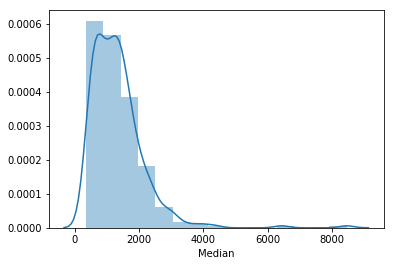

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df_rent['Median'],bins=15)

In [11]:
rent2b = df_rent[df_rent['Category'] == 'Two Bedroom']
rent2b.head()

,Year,Quarter,Code,Area,Category,Count of rents,Average,Lower quartile,Median,Upper quartile
130,2019,Q1,E09000001,City of London,Two Bedroom,30,2852,2383,2578,2925
131,2019,Q1,E09000002,Barking and Dagenham,Two Bedroom,320,1185,1100,1200,1300
132,2019,Q1,E09000003,Barnet,Two Bedroom,1190,1439,1295,1400,1500
133,2019,Q1,E09000004,Bexley,Two Bedroom,310,1076,995,1050,1200
134,2019,Q1,E09000005,Brent,Two Bedroom,710,1514,1350,1499,1630


In [14]:
frent1 = rent2b.loc[rent2b['Code'].isin(['E09000001','E09000002','E09000003','E09000004','E09000005','E09000006','E09000007','E09000008','E0900009','E090000010','E09000011','E09000012','E09000013','E09000014','E09000015','E09000016','E09000017','E09000018','E09000019','E09000020','E09000021','E09000022','E09000023','E09000024','E09000025','E09000026','E09000027','E09000028','E09000029','E09000030','E09000031','E09000032','E09000033'])]

In [15]:
frent1.head()

,Year,Quarter,Code,Area,Category,Count of rents,Average,Lower quartile,Median,Upper quartile
130,2019,Q1,E09000001,City of London,Two Bedroom,30,2852,2383,2578,2925
131,2019,Q1,E09000002,Barking and Dagenham,Two Bedroom,320,1185,1100,1200,1300
132,2019,Q1,E09000003,Barnet,Two Bedroom,1190,1439,1295,1400,1500
133,2019,Q1,E09000004,Bexley,Two Bedroom,310,1076,995,1050,1200
134,2019,Q1,E09000005,Brent,Two Bedroom,710,1514,1350,1499,1630


In [16]:
frent = frent1.drop(['Count of rents', 'Average', 'Lower quartile','Upper quartile'], axis = 1) 

In [17]:
frent.shape

(31, 6)

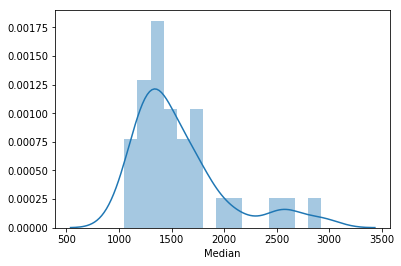

In [18]:
sns.distplot(frent['Median'],bins=15)

## Problem 2: Schools

##### The family has decided to chose the following Wards in London: City of London, Barking and Dagenham Barnet Bexley Brent Bromley Camden Croydon Ealing Enfield Greenwich Hackney Hammersmith and Fulham Haringey Harrow Havering Hillingdon Hounslow Islington Kensington and Chelsea Kingston upon Thames Lambeth Lewisham Merton Newham Redbridge Richmond upon Thames Southwark Sutton Tower Hamlets Waltham Forest Wandsworth Westminster

##### Let's create a dataframe with:
###### - schools from these areas
###### - school ratings 

In [19]:
body = client_a45dc0d5df144c1b8084138592292515.get_object(Bucket='capstone-donotdelete-pr-zr9fcd12hojrew',Key='schools.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

schools = pd.read_csv(body)
schools.head()

,Code,Area,Year,Sex,Pupils,Attainment8,Progress8
0,E09000002,Barking and Dagenham,2017/18,All,2199,46.1,0.17
1,E09000003,Barnet,2017/18,All,3810,56.0,0.57
2,E09000004,Bexley,2017/18,All,3032,49.6,-0.1
3,E09000005,Brent,2017/18,All,2858,49.9,0.54
4,E09000006,Bromley,2017/18,All,3214,50.3,0.03


In [20]:
allschools = schools.loc[(schools['Year'] == '2017/18') & (schools['Sex'] == 'All')]

In [21]:
allschools.head()

,Code,Area,Year,Sex,Pupils,Attainment8,Progress8
0,E09000002,Barking and Dagenham,2017/18,All,2199,46.1,0.17
1,E09000003,Barnet,2017/18,All,3810,56.0,0.57
2,E09000004,Bexley,2017/18,All,3032,49.6,-0.1
3,E09000005,Brent,2017/18,All,2858,49.9,0.54
4,E09000006,Bromley,2017/18,All,3214,50.3,0.03


##### Let's sort by the Highest Attainment and select the first 5 Areas that have schools with the highest Attainment score

In [22]:
fschools = allschools.sort_values(by=['Attainment8'], ascending=False)

In [23]:
fschools.head()

,Code,Area,Year,Sex,Pupils,Attainment8,Progress8
27,E09000029,Sutton,2017/18,All,2719,58.1,0.39
19,E09000021,Kingston upon Thames,2017/18,All,1515,57.8,0.53
1,E09000003,Barnet,2017/18,All,3810,56.0,0.57
24,E09000026,Redbridge,2017/18,All,3508,53.1,0.47
31,E09000033,Westminster,2017/18,All,1495,52.9,0.47


##### Now we have 5 Areas for schoos with the Highest Attainment. Lets MERGE the two dataframes (Rent and Schools) and see what is the MEDIAN rent in these 5 Areas: Sutton, Kingston upon Thames, Barnet, Redbridge & Westminster

In [24]:
mergedsr = pd.merge(frent,
                 fschools[['Code', 'Attainment8']],
                 on='Code')
mergedsr.head()

,Year,Quarter,Code,Area,Category,Median,Attainment8
0,2019,Q1,E09000002,Barking and Dagenham,Two Bedroom,1200,46.1
1,2019,Q1,E09000003,Barnet,Two Bedroom,1400,56.0
2,2019,Q1,E09000004,Bexley,Two Bedroom,1050,49.6
3,2019,Q1,E09000005,Brent,Two Bedroom,1499,49.9
4,2019,Q1,E09000006,Bromley,Two Bedroom,1250,50.3


In [26]:
fmergedsr = mergedsr.sort_values(by=['Attainment8'], ascending=False)

In [27]:
fmergedsr.head(5)

,Year,Quarter,Code,Area,Category,Median,Attainment8
25,2019,Q1,E09000029,Sutton,Two Bedroom,1150,58.1
17,2019,Q1,E09000021,Kingston upon Thames,Two Bedroom,1350,57.8
1,2019,Q1,E09000003,Barnet,Two Bedroom,1400,56.0
22,2019,Q1,E09000026,Redbridge,Two Bedroom,1270,53.1
29,2019,Q1,E09000033,Westminster,Two Bedroom,2546,52.9


###### Westminster rent is twice higher than other areas. So the family decides to drop Westminster.

In [29]:
final1 = fmergedsr.loc[fmergedsr['Code'].isin(['E09000029','E09000021','E09000003','E09000026'])]

In [30]:
final1.shape

(4, 7)

##### Using the initial Dataset, let's see what other scores these four Areas have

In [31]:
scores = pd.merge(final1,
                 df_london[['Code', '% of pupils whose first language is not English (2015)','Happiness score 2011-14 (out of 10)','Anxiety score 2011-14 (out of 10)','Population density (per hectare) 2017','Crime rates per thousand population 2014/15']],
                 on='Code')
scores.head()

,Year,Quarter,Code,Area,Category,Median,Attainment8,% of pupils whose first language is not English (2015),Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Population density (per hectare) 2017,Crime rates per thousand population 2014/15
0,2019,Q1,E09000029,Sutton,Two Bedroom,1150,58.1,34.3,7.3,3.2,46.2,55.9
1,2019,Q1,E09000021,Kingston upon Thames,Two Bedroom,1350,57.8,39.3,7.4,3.3,47.1,58.5
2,2019,Q1,E09000003,Barnet,Two Bedroom,1400,56.0,46.0,7.4,2.8,44.9,62.7
3,2019,Q1,E09000026,Redbridge,Two Bedroom,1270,53.1,66.5,7.3,3.2,53.9,69.7


#### Based on this results the family makes a decision to drop Barnet and Redbridge due to higher Crime Rates and selects Kingston upon Thames as it has a higher value for "% of pupils whose first language is not English (2015)" and the family is looking for a more international community, plus the Happiness score 2011-14 (out of 10) is also high.

## So thanks to the above analysis the family has now chosen the Kingston upon Thames Area which will be researched with Foursquare API further